In [55]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

# Load the Diabetes dataset from scikit-learn
diabetes = load_diabetes(as_frame=True, scaled=True)
dataset_dia = diabetes.data


data_types = dataset_dia.dtypes
print(data_types)


age    float64
sex    float64
bmi    float64
bp     float64
s1     float64
s2     float64
s3     float64
s4     float64
s5     float64
s6     float64
dtype: object


In [56]:
dataset_dia.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [57]:
dataset_dia.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [58]:
X = dataset_dia['age']
y = diabetes.target


In [59]:
def cost_function(weight, bias, X, y):
    J = 0.0
    n = len(y)
    for i in range(n):
        J += (weight * X[i] + bias - y[i])**2
    J /= (2 * n)
    return J

# Define function to compute gradients for linear regression
def get_gradients(weight, bias, X, y):
    dJ_dw = 0.0
    dJ_db = 0.0
    n = len(y)
    for i in range(n):
        dJ_dw += (weight * X[i] + bias - y[i]) * X[i]
        dJ_db += weight * X[i] + bias - y[i]    
    dJ_dw /= n
    dJ_db /= n
    return dJ_dw, dJ_db

# Define gradient descent function for linear regression
def gradient_descent(X, y, weight=1.0, bias=1.0, learning_rate=0.9, threshold=0.1):
    isConverged = False
    weight_ = weight
    bias_ = bias
    iter_count = 0
    while not isConverged:
        iter_count += 1
        dw, db = get_gradients(weight_, bias_, X, y)
        weight_ -= learning_rate * dw
        bias_ -= learning_rate * db
        if abs(learning_rate * dw) < threshold and abs(learning_rate * db) < threshold:
            isConverged = True
        weight = weight_
        bias = bias_
    print("Converged in", iter_count, "iterations...")
    return weight_, bias_

In [60]:
# Example usage:
linear = Linear_Regression(0.1, 1000)
linear.fit(X, y)

y_pred = linear.predict(X)
print("Predictions:", y_pred)

Exception: Dot product shape mismatch, (442,) vs (1,)

Mean Squared Error (MSE): 5725.96027767658


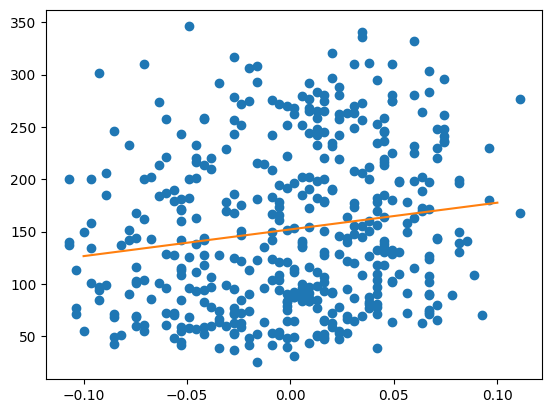

In [ ]:
# Visualize the linear regression model
import matplotlib.pyplot as plt

plt.plot(X, y, 'o')
zx = np.linspace(-0.1, 0.1, 100)
zy = w * zx + b
plt.plot(zx, zy)
plt.show()
